<H1> KIPA PROJECT </H1>
<H3> MDSSB-DSAI-01 DIGITAL TRANSFORMATION </H3>
Aiman Alam | Modou Lamin Manjang | Husnain Dawood | Niloufar Shokri | Sergey Polyarus | Suraj Karakulath

We want to find correlations/patterns between the price of waste (bought from suppliers) and various potential price determinants such as weather, energy, business cycle, Euwid and Quantities.

In [41]:
#Importing libraries (include plotly)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [42]:
#Pricing dataset 
df = pd.read_excel('df.xlsx')
df.head()

,week,wPreis,Plz,full,date
0,2020-37,-37.519318,"['25', '24']",A2 - geschreddert,2020-09-14
1,2020-39,-40.000000,"['25', '24']",A2 - geschreddert,2020-09-28
2,2020-41,-34.853543,"['25', '24']",A2 - geschreddert,2020-10-12
3,2020-42,-27.560202,"['25', '24']",A2 - geschreddert,2020-10-19
4,2020-43,-31.937780,"['25', '24']",A2 - geschreddert,2020-10-26


<h2>Quick Exploration of Pricing Dataset

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3379 entries, 0 to 3378
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   week    3379 non-null   object        
 1   wPreis  3379 non-null   float64       
 2   Plz     3379 non-null   object        
 3   full    3379 non-null   object        
 4   date    3379 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 132.1+ KB


There are no null values in any of the 3379 observations.

In [44]:
df['Plz'].unique()

array(["['25', '24']", "['26', '27', '28']", "['20', '21', '22', '23']",
       "['29', '30', '31', '38', '39']",
       "['10', '11', '12', '13', '14', '15', '16']", "['48', '49']",
       "['1', '4', '6', '7', '8', '9']",
       "['40', '41', '42', '44', '45', '46', '47']",
       "['50', '51', '52', '53']",
       "['80', '81', '82', '83', '84', '85', '93', '94']"], dtype=object)

In [45]:
len(df['Plz'].unique())

10

There are 10 unique clusters.

In [46]:
df['full'].unique()

array(['A2 -  geschreddert', 'A1 & A2 -  geschreddert',
       'A2 & A3 -  geschreddert', 'A3 -  geschreddert'], dtype=object)

And 4 unique product categories.

"['10', '11', '12', '13', '14', '15', '16']", "['48', '49']"

We explore a few clusters by splitting among ourselves as:
[Monday 13:25] Shokri, Niloufar

- Nilou: ['25', '24']", "['26', '27', '28']", "['20', '21', '22', '23']
- Aiman: "['29', '30', '31', '38', '39']
- Suraj: "['10', '11', '12', '13', '14', '15', '16']", "['48', '49']
- Momo: "['1', '4', '6', '7', '8', '9']

Looking at the **['25','24'] ** cluster for the **product category 'A2 -  geschreddert'** first.

In [47]:
TS1 = df[(df['Plz'] == "['25', '24']")]
TS1.head()

,week,wPreis,Plz,full,date
0,2020-37,-37.519318,"['25', '24']",A2 - geschreddert,2020-09-14
1,2020-39,-40.000000,"['25', '24']",A2 - geschreddert,2020-09-28
2,2020-41,-34.853543,"['25', '24']",A2 - geschreddert,2020-10-12
3,2020-42,-27.560202,"['25', '24']",A2 - geschreddert,2020-10-19
4,2020-43,-31.937780,"['25', '24']",A2 - geschreddert,2020-10-26


In [48]:
fig = px.line(TS1, x='date', y='wPreis', color='full', title='Weekly Prices for [25,24] by Category')
fig.show()

In [49]:
TS2 = df[(df['Plz'] == "['26', '27', '28']")]
TS2.tail()

,week,wPreis,Plz,full,date
768,2023-32,-0.779286,"['26', '27', '28']",A2 & A3 - geschreddert,2023-08-07
769,2023-33,0.603443,"['26', '27', '28']",A2 & A3 - geschreddert,2023-08-14
770,2023-34,-1.843453,"['26', '27', '28']",A2 & A3 - geschreddert,2023-08-21
771,2023-35,12.932210,"['26', '27', '28']",A2 & A3 - geschreddert,2023-08-28
772,2023-36,10.456992,"['26', '27', '28']",A2 & A3 - geschreddert,2023-09-04


In [50]:
fig = px.line(TS2, x='date', y='wPreis', color='full', title='Weekly Prices for [26,27,28] by Category')
fig.show()

In [51]:
TS3 = df[(df['Plz'] == "['20', '21', '22', '23']")]

fig = px.line(TS3, x='date', y='wPreis', color='full', title='Weekly Prices for [20,21,22,23] by Product Category')
fig.show()

In [52]:
TS4 = df[(df['Plz'] == "['10', '11', '12', '13', '14', '15', '16']")]  
fig = px.line(TS4, x='date', y='wPreis', color='full', title='Weekly Prices for [10, 11, 12, 13, 14, 15, 16] by Category')
fig.show()

In [98]:
TS5 = df[(df['Plz'] == "['48', '49']")]  
fig = px.line(TS5, x='date', y='wPreis', color='full', title='Weekly Prices for [48, 49] by Category')
fig.show()

In [54]:
TS7 = df[(df['Plz'] == "['1', '4', '6', '7', '8', '9']")]  
TS7.head()


,week,wPreis,Plz,full,date
2154,2020-37,3.314264,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-09-14
2155,2020-38,6.106024,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-09-21
2156,2020-39,8.117571,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-09-28
2157,2020-40,12.717265,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-10-05
2158,2020-41,13.049207,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-10-12


In [55]:
fig = px.line(TS7, x='date', y='wPreis', color='full', title='Weekly Prices for [1, 4, 6, 7, 8, 9] by Category')
fig.show()

Interestingly for 7th cluster, [1, 4, 6, 7, 8, 9] just like the forth cluster, there is only one waste category, *A1 & A2*


In [56]:
TS8 = df[(df['Plz'] == "['40', '41', '42', '44', '45', '46', '47']")]  
TS8.head()


,week,wPreis,Plz,full,date
2297,2020-37,-45.783077,"['40', '41', '42', '44', '45', '46', '47']",A3 - geschreddert,2020-09-14
2298,2020-38,-31.691897,"['40', '41', '42', '44', '45', '46', '47']",A3 - geschreddert,2020-09-21
2299,2020-39,-32.208389,"['40', '41', '42', '44', '45', '46', '47']",A3 - geschreddert,2020-09-28
2300,2020-40,-26.762905,"['40', '41', '42', '44', '45', '46', '47']",A3 - geschreddert,2020-10-05
2301,2020-41,-28.922455,"['40', '41', '42', '44', '45', '46', '47']",A3 - geschreddert,2020-10-12


In [57]:
fig = px.line(TS8, x='date', y='wPreis', color='full', title='Weekly Prices for [40, 41, 42, 44, 45 46, 47] by Category')
fig.show()

The wPreis of categories in the same cluster follow a similar series, almost identical.

<h2> Exploring Potential Price Determinants </h2>

### 1. Energy (Electricity, Oil and Gas)

####  Oil first. 

- We do not have access to any data that has oil prices per region in Germany (it may not make sense either)
- So we look at Global Oil and Gas Market Prices as a proxy from Yahoo finance https://finance.yahoo.com/quote/CL%3DF/history?period1=1599436800&period2=1694649600&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true   (No download option but can copy and paste into excel)
- And *assume that relative changes in global prices have a proportional impact on the same prices in Germany*

In [58]:
#Oil
oil = pd.read_excel('Crude_oil.xlsx')
oil.head() 

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Sep 11, 2023",87.40,89.64,86.71,88.52,88.52,974.662
1,"Sep 04, 2023",86.06,88.08,85.02,87.51,87.51,"1,325,196"
2,"Aug 28, 2023",80.15,86.06,79.34,85.55,85.55,"1,619,479"
3,"Aug 21, 2023",81.43,82.47,77.59,79.83,79.83,"1,542,148"
4,"Aug 14, 2023",83.09,83.20,78.95,81.25,81.25,"1,269,633"


When exploring correlations between weekly oil prices and the price of another commodity like waste, the "Close" or "Adj Close" price is often used.

**Close Price**: The "Close" price represents the closing price of the commodity for a specific trading day. It is the last price at which a trade occurred before the market closed for that day. This is a commonly used price metric for historical price analysis.

**Adjusted Close Price (Adj Close)**: The "Adj Close" price accounts for events such as stock splits and dividend payments. It is often considered more accurate for long-term analysis because it adjusts for corporate actions that can affect the price. In the context of Crude Oil, if there are similar adjustments, the "Adj Close" can be a better choice for long-term correlations.

In [59]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         158 non-null    object 
 1   Open         158 non-null    float64
 2   High         158 non-null    float64
 3   Low          158 non-null    float64
 4   Close*       158 non-null    float64
 5   Adj Close**  158 non-null    float64
 6   Volume       158 non-null    object 
dtypes: float64(5), object(2)
memory usage: 8.8+ KB


158 entries for each week and no null values.

Transformation: Date here is in an object format so we convert it to datetime64[ns]

In [60]:
oil["Date"] = pd.to_datetime(oil["Date"])

In [61]:
oil.sort_values(by='Date')

,Date,Open,High,Low,Close*,Adj Close**,Volume
157,2020-09-07,39.48,39.59,36.13,37.33,37.33,"1,907,673"
156,2020-09-14,37.32,41.49,36.82,41.11,41.11,"1,430,611"
155,2020-09-21,40.98,41.27,38.66,40.25,40.25,"1,171,773"
154,2020-09-28,40.07,40.80,36.63,37.05,37.05,"1,781,188"
153,2020-10-05,37.00,41.47,37.00,40.60,40.60,"1,953,665"
...,...,...,...,...,...,...,...
4,2023-08-14,83.09,83.20,78.95,81.25,81.25,"1,269,633"
3,2023-08-21,81.43,82.47,77.59,79.83,79.83,"1,542,148"
2,2023-08-28,80.15,86.06,79.34,85.55,85.55,"1,619,479"
1,2023-09-04,86.06,88.08,85.02,87.51,87.51,"1,325,196"


Quick look at the distribution of crude oil prices (Adj Close)

In [62]:
fig = px.line(oil, x='Date', y='Adj Close**', title='Weekly Adjusted Close Price for Crude Oil')
fig.show()

### Now exploring the correlation of this Adjusted Close Price with the wPreis of **only one of the clusters (48,49):**
For this we combine the 2 dataframes (TS5 and oil) - INNER JOIN by the 'date' variable in TS5 and 'Date' variable in oil (which has been transformed)

In [63]:
combined_df = pd.merge(TS5[['date', 'wPreis', 'full']], oil[['Date', 'Adj Close**']], left_on='date', right_on='Date', how='inner')
# And drop the duplicate 'Date' column 
combined_df = combined_df.drop(columns='Date')
combined_df


,date,wPreis,full,Adj Close**
0,2020-09-14,-29.244584,A3 - geschreddert,41.11
1,2020-09-14,-29.244584,A2 & A3 - geschreddert,41.11
2,2020-09-21,-27.878925,A3 - geschreddert,40.25
3,2020-09-21,-27.878925,A2 & A3 - geschreddert,40.25
4,2020-09-28,-25.077400,A3 - geschreddert,37.05
...,...,...,...,...
295,2023-08-21,4.426446,A2 & A3 - geschreddert,79.83
296,2023-08-28,5.545975,A3 - geschreddert,85.55
297,2023-08-28,5.545975,A2 & A3 - geschreddert,85.55
298,2023-09-04,8.037723,A3 - geschreddert,87.51


In [64]:
# Get unique categories
categories = combined_df['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = combined_df[combined_df['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close**'], mode='lines', name=f'Adj Close** ({category})'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [48,49]",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

Some quick observations (purely from visualization):
- The wPreis and Adj Close price of Crude oil for both categories seem to be **closely correlated from Sep 2020 to around Jan 2022**. 
- For **Category A3 - geschreddert**, the correlation roughly continues *until June 2022* after which it becomes an **inverse correlation** until December 2022 and then low correlation until Sep 2023
- For **Category A2 & A3 - geschreddert**, the correlation continues from Jan 2022 to around March 2022 after which they slowly become inverse correlated until Dec 2022, and similar to the other category, loses the correlation after that.

Something remained consistent until Jan 2022. After that things began going in the opposite direction. And from Dec 2022 onwards they become less correlated.

More investigation needed to explore further.

#### Electricity next.
The data is *available only from 1 Jan 2021*. The spot market prices arise or are calculated from the hourly prices and quantities of all electricity exchanges. And values are for Germany not regional.

In [65]:
elec = pd.read_csv('electricity.csv', sep=';')
elec.head() 

,Datum,von,Zeitzone von,bis,Zeitzone bis,Spotmarktpreis in ct/kWh
0,01.01.2021,00:00,CET,01:00,CET,"5,087"
1,01.01.2021,01:00,CET,02:00,CET,"4,819"
2,01.01.2021,02:00,CET,03:00,CET,"4,468"
3,01.01.2021,03:00,CET,04:00,CET,"4,292"
4,01.01.2021,04:00,CET,05:00,CET,"4,039"


In [66]:
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23351 entries, 0 to 23350
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Datum                     23351 non-null  object
 1   von                       23351 non-null  object
 2   Zeitzone von              23351 non-null  object
 3   bis                       23351 non-null  object
 4   Zeitzone bis              23351 non-null  object
 5   Spotmarktpreis in ct/kWh  23351 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


There are 23351 entries and it makes sense as it is hourly data from Jan 1 2021 (24 hours x (2 years + 8 months + 21 days until Sep 21).

Quick visual exploration. For this, we need to convert Datum to date-time format.

In [67]:
elec["Datum"] = pd.to_datetime(elec["Datum"])

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_37503/44262613.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [68]:
elec.tail()

,Datum,von,Zeitzone von,bis,Zeitzone bis,Spotmarktpreis in ct/kWh
23346,2023-08-31,19:00,CEST,20:00,CEST,"14,855"
23347,2023-08-31,20:00,CEST,21:00,CEST,"13,915"
23348,2023-08-31,21:00,CEST,22:00,CEST,"12,55"
23349,2023-08-31,22:00,CEST,23:00,CEST,"10,603"
23350,2023-08-31,23:00,CEST,00:00,CEST,"9,689"


In [69]:
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23351 entries, 0 to 23350
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Datum                     23351 non-null  datetime64[ns]
 1   von                       23351 non-null  object        
 2   Zeitzone von              23351 non-null  object        
 3   bis                       23351 non-null  object        
 4   Zeitzone bis              23351 non-null  object        
 5   Spotmarktpreis in ct/kWh  23351 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 1.1+ MB


In [70]:
# Replace commas with periods in the 'Spotmarktpreis in ct/kWh' column and Converting prices into float variables
elec['Spotmarktpreis in ct/kWh'] = elec['Spotmarktpreis in ct/kWh'].str.replace(',', '.').astype(float)
elec.head()


,Datum,von,Zeitzone von,bis,Zeitzone bis,Spotmarktpreis in ct/kWh
0,2021-01-01,00:00,CET,01:00,CET,5.087
1,2021-01-01,01:00,CET,02:00,CET,4.819
2,2021-01-01,02:00,CET,03:00,CET,4.468
3,2021-01-01,03:00,CET,04:00,CET,4.292
4,2021-01-01,04:00,CET,05:00,CET,4.039


In [71]:
# Convert 'Datum' and 'von' to datetime separately and then combine them
elec['von'] = pd.to_datetime(elec['von'], format='%H:%M')
elec.head()

,Datum,von,Zeitzone von,bis,Zeitzone bis,Spotmarktpreis in ct/kWh
0,2021-01-01,1900-01-01 00:00:00,CET,01:00,CET,5.087
1,2021-01-01,1900-01-01 01:00:00,CET,02:00,CET,4.819
2,2021-01-01,1900-01-01 02:00:00,CET,03:00,CET,4.468
3,2021-01-01,1900-01-01 03:00:00,CET,04:00,CET,4.292
4,2021-01-01,1900-01-01 04:00:00,CET,05:00,CET,4.039


In [72]:
# # Extract the time part without the date component
elec['von'] = elec['von'].dt.strftime('%H:%M:%S')
elec.head()

,Datum,von,Zeitzone von,bis,Zeitzone bis,Spotmarktpreis in ct/kWh
0,2021-01-01,00:00:00,CET,01:00,CET,5.087
1,2021-01-01,01:00:00,CET,02:00,CET,4.819
2,2021-01-01,02:00:00,CET,03:00,CET,4.468
3,2021-01-01,03:00:00,CET,04:00,CET,4.292
4,2021-01-01,04:00:00,CET,05:00,CET,4.039


In [73]:
elec['combined_datetime'] = elec['Datum'] + pd.to_timedelta(elec['von'].astype(str))
elec.head()

,Datum,von,Zeitzone von,bis,Zeitzone bis,Spotmarktpreis in ct/kWh,combined_datetime
0,2021-01-01,00:00:00,CET,01:00,CET,5.087,2021-01-01 00:00:00
1,2021-01-01,01:00:00,CET,02:00,CET,4.819,2021-01-01 01:00:00
2,2021-01-01,02:00:00,CET,03:00,CET,4.468,2021-01-01 02:00:00
3,2021-01-01,03:00:00,CET,04:00,CET,4.292,2021-01-01 03:00:00
4,2021-01-01,04:00:00,CET,05:00,CET,4.039,2021-01-01 04:00:00


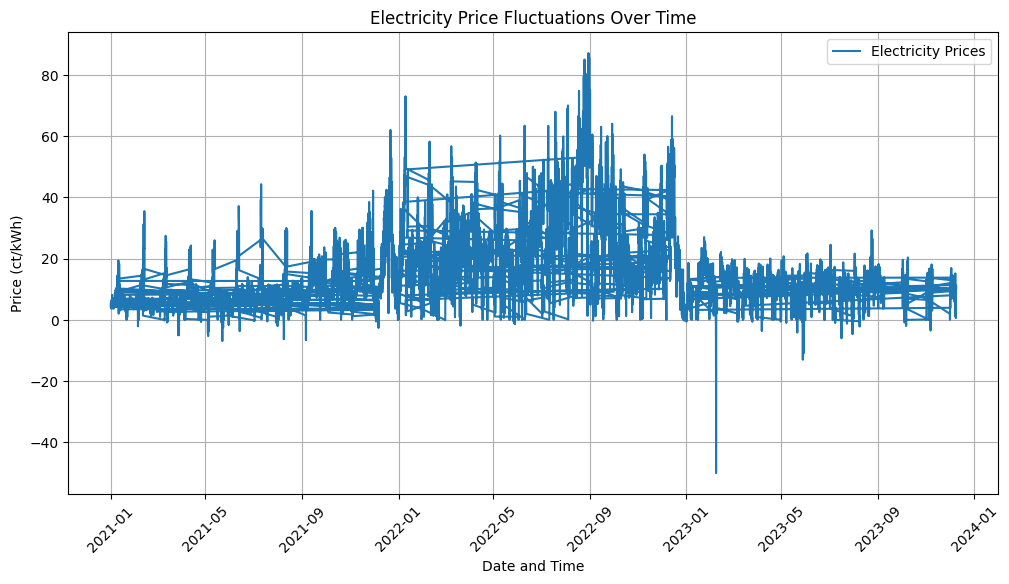

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(elec['combined_datetime'], elec['Spotmarktpreis in ct/kWh'], label='Electricity Prices')
plt.title('Electricity Price Fluctuations Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Price (ct/kWh)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


That was poor thinking for plotting.

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_37503/1495539809.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



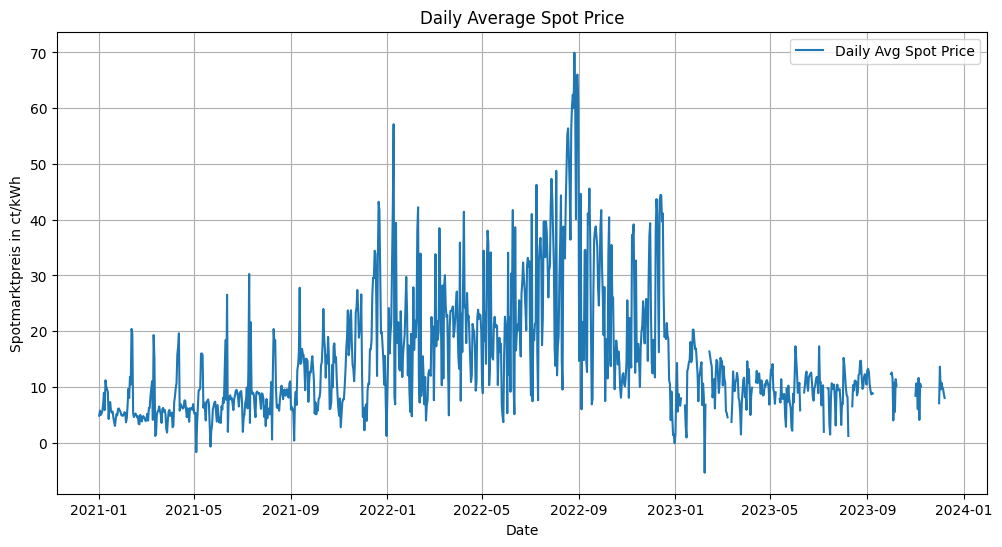

In [75]:
# Resample data to daily averages
daily_avg = elec.resample('D', on='combined_datetime').mean()

# Plot the daily averages
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['Spotmarktpreis in ct/kWh'], label='Daily Avg Spot Price')
plt.xlabel('Date')
plt.ylabel('Spotmarktpreis in ct/kWh')
plt.title('Daily Average Spot Price')
plt.grid(True)
plt.legend()
plt.show()

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_37503/77732367.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



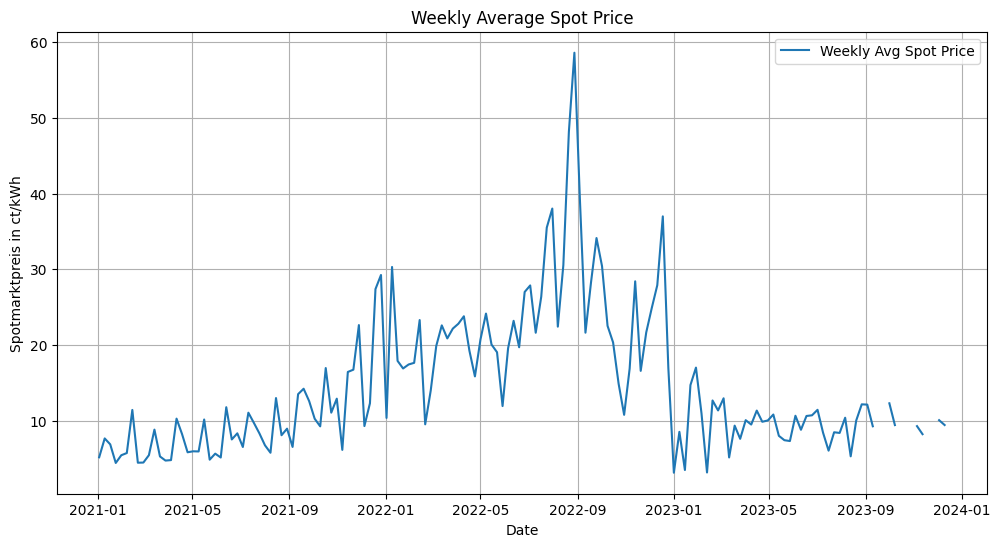

In [85]:
# Resample data to daily averages
weekly_avg = elec.resample('W', on='combined_datetime').mean()

# Plot the daily averages
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg.index, weekly_avg['Spotmarktpreis in ct/kWh'], label='Weekly Avg Spot Price')
plt.xlabel('Date')
plt.ylabel('Spotmarktpreis in ct/kWh')
plt.title('Weekly Average Spot Price')
plt.grid(True)
plt.legend()
plt.show()

In [86]:
weekly_avg

,Spotmarktpreis in ct/kWh
combined_datetime,
2021-01-03,5.187889
2021-01-10,7.676268
2021-01-17,6.894625
2021-01-24,4.438315
2021-01-31,5.455792
...,...
2023-11-12,8.238292
2023-11-19,NaN
2023-11-26,NaN


In [87]:
weekly_avg.reset_index(inplace=True)


In [91]:
weekly_avg

,combined_datetime,Spotmarktpreis in ct/kWh
0,2021-01-03,5.187889
1,2021-01-10,7.676268
2,2021-01-17,6.894625
3,2021-01-24,4.438315
4,2021-01-31,5.455792
...,...,...
149,2023-11-12,8.238292
150,2023-11-19,NaN
151,2023-11-26,NaN
152,2023-12-03,10.086139


In [97]:
TS5

,week,wPreis,Plz,full
date,,,,
2020-09-14,2020-37,-29.244584,"['48', '49']",A3 - geschreddert
2020-09-21,2020-38,-27.878925,"['48', '49']",A3 - geschreddert
2020-09-28,2020-39,-25.077400,"['48', '49']",A3 - geschreddert
2020-10-05,2020-40,-25.663645,"['48', '49']",A3 - geschreddert
2020-10-12,2020-41,-24.004958,"['48', '49']",A3 - geschreddert
...,...,...,...,...
2023-08-07,2023-32,17.044359,"['48', '49']",A2 & A3 - geschreddert
2023-08-14,2023-33,4.038512,"['48', '49']",A2 & A3 - geschreddert
2023-08-21,2023-34,4.426446,"['48', '49']",A2 & A3 - geschreddert


In [99]:
# Create a new column 'week' representing the week number
TS5['weekno'] = TS5['date'].dt.strftime('%U-%Y')  # Format: WeekNumber-Year
TS5

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_37503/2847943029.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,week,wPreis,Plz,full,date,weekno
1854,2020-37,-29.244584,"['48', '49']",A3 - geschreddert,2020-09-14,37-2020
1855,2020-38,-27.878925,"['48', '49']",A3 - geschreddert,2020-09-21,38-2020
1856,2020-39,-25.077400,"['48', '49']",A3 - geschreddert,2020-09-28,39-2020
1857,2020-40,-25.663645,"['48', '49']",A3 - geschreddert,2020-10-05,40-2020
1858,2020-41,-24.004958,"['48', '49']",A3 - geschreddert,2020-10-12,41-2020
...,...,...,...,...,...,...
2149,2023-32,17.044359,"['48', '49']",A2 & A3 - geschreddert,2023-08-07,32-2023
2150,2023-33,4.038512,"['48', '49']",A2 & A3 - geschreddert,2023-08-14,33-2023
2151,2023-34,4.426446,"['48', '49']",A2 & A3 - geschreddert,2023-08-21,34-2023
2152,2023-35,5.545975,"['48', '49']",A2 & A3 - geschreddert,2023-08-28,35-2023


In [100]:
weekly_avg

,combined_datetime,Spotmarktpreis in ct/kWh
0,2021-01-03,5.187889
1,2021-01-10,7.676268
2,2021-01-17,6.894625
3,2021-01-24,4.438315
4,2021-01-31,5.455792
...,...,...
149,2023-11-12,8.238292
150,2023-11-19,NaN
151,2023-11-26,NaN
152,2023-12-03,10.086139


In [101]:
# Create a new column 'week' representing the week number
weekly_avg['weekno'] = weekly_avg['combined_datetime'].dt.strftime('%U-%Y')  # Format: WeekNumber-Year
weekly_avg

,combined_datetime,Spotmarktpreis in ct/kWh,weekno
0,2021-01-03,5.187889,01-2021
1,2021-01-10,7.676268,02-2021
2,2021-01-17,6.894625,03-2021
3,2021-01-24,4.438315,04-2021
4,2021-01-31,5.455792,05-2021
...,...,...,...
149,2023-11-12,8.238292,46-2023
150,2023-11-19,NaN,47-2023
151,2023-11-26,NaN,48-2023
152,2023-12-03,10.086139,49-2023


In [103]:
# Merge 'TS5' and 'elec' based on the 'week' column
combined_elect = pd.merge(TS5, weekly_avg, on='weekno', how='inner')
combined_elect

,week,wPreis,Plz,full,date,weekno,combined_datetime,Spotmarktpreis in ct/kWh
0,2020-53,-30.855857,"['48', '49']",A3 - geschreddert,2021-01-04,01-2021,2021-01-03,5.187889
1,2021-01,-28.406423,"['48', '49']",A3 - geschreddert,2021-01-04,01-2021,2021-01-03,5.187889
2,2020-53,-30.855857,"['48', '49']",A2 & A3 - geschreddert,2021-01-04,01-2021,2021-01-03,5.187889
3,2021-01,-28.406423,"['48', '49']",A2 & A3 - geschreddert,2021-01-04,01-2021,2021-01-03,5.187889
4,2021-02,-28.517571,"['48', '49']",A3 - geschreddert,2021-01-11,02-2021,2021-01-10,7.676268
...,...,...,...,...,...,...,...,...
265,2023-34,4.426446,"['48', '49']",A2 & A3 - geschreddert,2023-08-21,34-2023,2023-08-20,10.042887
266,2023-35,5.545975,"['48', '49']",A3 - geschreddert,2023-08-28,35-2023,2023-08-27,12.177613
267,2023-35,5.545975,"['48', '49']",A2 & A3 - geschreddert,2023-08-28,35-2023,2023-08-27,12.177613
268,2023-36,8.037723,"['48', '49']",A3 - geschreddert,2023-09-04,36-2023,2023-09-03,12.140506


In [104]:
combined_elect.drop(columns=['week','date','combined_datetime'], inplace=True)
combined_elect.sort_values(by='weekno')

,wPreis,Plz,full,weekno,Spotmarktpreis in ct/kWh
0,-30.855857,"['48', '49']",A3 - geschreddert,01-2021,5.187889
1,-28.406423,"['48', '49']",A3 - geschreddert,01-2021,5.187889
2,-30.855857,"['48', '49']",A2 & A3 - geschreddert,01-2021,5.187889
3,-28.406423,"['48', '49']",A2 & A3 - geschreddert,01-2021,5.187889
107,14.319133,"['48', '49']",A2 & A3 - geschreddert,01-2022,10.383893
...,...,...,...,...,...
204,72.442489,"['48', '49']",A3 - geschreddert,51-2022,36.989869
104,16.345424,"['48', '49']",A3 - geschreddert,52-2021,29.253595
105,13.879043,"['48', '49']",A2 & A3 - geschreddert,52-2021,29.253595
207,77.328708,"['48', '49']",A2 & A3 - geschreddert,52-2022,16.982190


In [109]:
# Group the data by 'week' and 'full' and calculate weekly means
grouped_data = combined_elect.groupby(['weekno', 'full']).mean().reset_index()

# Get unique categories from the 'full' column
categories = grouped_data['full'].unique()

# Create an empty list to store the data traces
data_traces_wPreis = []
data_traces_Spotmarktpreis = []

# Create traces for each category
for category in categories:
    data = grouped_data[grouped_data['full'] == category]
    
    trace_wPreis = go.Scatter(
        x=data['weekno'],
        y=data['wPreis'],
        mode='lines',
        name=f'wPreis - {category}',
        hoverinfo='x+y',
        yaxis='y1',
    )
    data_traces_wPreis.append(trace_wPreis)
    
    trace_Spotmarktpreis = go.Scatter(
        x=data['weekno'],
        y=data['Spotmarktpreis in ct/kWh'],
        mode='lines',
        name=f'Spotmarktpreis - {category}',
        hoverinfo='x+y',
        yaxis='y2',
    )
    data_traces_Spotmarktpreis.append(trace_Spotmarktpreis)

# Create layout for the plot with dual y-axes
layout = go.Layout(
    title="Time Series of wPreis and Spotmarktpreis",
    xaxis=dict(title="Week No"),
    yaxis=dict(title="wPreis", side='left', showgrid=False),
    yaxis2=dict(title="Spotmarktpreis in ct/kWh", side='right', overlaying='y', showgrid=False),
    showlegend=True,
)

# Create the Plotly figure with dual y-axes
fig = go.Figure(data=data_traces_wPreis + data_traces_Spotmarktpreis, layout=layout)

# Show the interactive Plotly plot
fig.show()

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_37503/1036827681.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [108]:
# Get unique categories
categories = combined_elect['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = combined_df[combined_elect['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['weekno'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['weekno'], y=category_data['Spotmarktpreis in ct/kWh'], mode='lines', name=f'Spotmarktpreis in ct/kWh ({category})'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison of Spotmarktpreis in ct/kWh and wPreis by Category for the cluster [48,49]",
    xaxis_title="Weekno",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_37503/1029277402.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [107]:
# Group the data by 'week' and 'full' and calculate weekly means
grouped_data = combined_elect.groupby(['weekno', 'full']).mean().reset_index()

# Get unique categories from the 'full' column
categories = grouped_data['full'].unique()

# Create an empty list to store the data traces
data_traces = []

# Create traces for each category
for category in categories:
    data = grouped_data[grouped_data['full'] == category]
    trace = go.Scatter(
        x=data['weekno'],
        y=data['wPreis'],
        mode='lines',
        name=f'wPreis - {category}',
        hoverinfo='x+y',
    )
    data_traces.append(trace)

# Create layout for the plot
layout = go.Layout(
    title="Time Series of wPreis by Category",
    xaxis=dict(title="Week"),
    yaxis=dict(title="wPreis"),
    showlegend=True,
)

# Create the Plotly figure
fig = go.Figure(data=data_traces, layout=layout)

# Show the interactive Plotly plot
fig.show()


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_37503/73351061.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
# Get unique categories
categories = combined_elect['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = combined_df[combined_df['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close**'], mode='lines', name=f'Adj Close** ({category})'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [48,49]",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=elec['Datetime'].dt.hour, y=elec['Spotmarktpreis in ct/kWh'])
plt.title('Hourly Electricity Price Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Price (ct/kWh)')
plt.xticks(rotation=45)
plt.show()


KeyError: 'Datetime'

<Figure size 1000x600 with 0 Axes>

In [24]:
fig = px.line(elec, x='Datum', y='Spotmarktpreis in ct/kWh', title='Electricity')
fig.show()

2. Weather (Wind, Temp)

To get the weather data, firts we need to find the center of each ***Postleitzahl***.
Here are the centers based on <https://academickids.com/encyclopedia/index.php/List_of_postal_codes_in_Germany> and <https://simple.wikipedia.org/wiki/Postal_codes_in_Germany>:

20: Hamburg (53.5507,9.993)

21: Hamburg (53.5507,9.993), Elbinsel Wilhelmsburg (53.5067,9.9871), Kirchdorf (52.5952,8.8349), Reinbek (53.517,10.2488), Buchholz in der Nordheide (53.3264,9.8681), Stade (53.5934,9.4763), Freiburg/Elbe (53.8236,9.2854), Balje (53.8333,9.1333)

22: Hamburg (53.5507,9.993)

23: Lübeck (53.8689,10.6873), Plön (54.1624,10.4233)

24: Kiel (54.3213,10.1349), Altenholz (54.4,10.1333), Gettorf (54.4,9.9833), Eckernförde (54.4685,9.8382), Neumünster (54.0748,9.9819), Henstedt-Ulzburg (53.7903,10.0054), Kaltenkirchen (53.8329,9.9581), Bad Bramstedt (53.9183,9.8842), Nortorf (54.1674,9.8544), Hohenwestedt (54.0889,9.6536), Boostedt (54.0167,10.0333), Trappenkamp (54.0399,10.215), Rendsburg (54.3066,9.6631), Büdelsdorf (54.3184,9.673), Flensburg (54.7843,9.4396)

25: Uetersen (53.6877,9.6639), Tornesch (53.7,9.7167), Moorrege (53.6667,9.6667), Heidgraben (53.7079,9.681), Groß Nordende (53.7,9.65), Neuendeich (53.6833,9.6167), Marne (54.35,8.7667), Husum (54.4858,9.0524) , Schwabstedt (54.3971,9.1865)

26: Bad Zwischenahn (53.1833,8), Wilhelmshaven (53.53,8.1125), Aurich (53.4692,7.4823), Apen (53.2167,7.8), Leer (53.2316,7.461), Moormerland (53.3114,7.423), Rhauderfehn (53.1333,7.6167), Hesel (53.3,7.6), Jemgum (53.2667,7.3833), Elsfleth (53.2375,8.4566)

27: Steinkirchen (53.566,9.6111), Hollern-Twielenfleth (53.5998,9.5522)

28: Bremen (53.0758,8.8072)


In [51]:
w_average_20212223 = pd.read_csv('w_average_20212223.csv')
w_average_20212223.head()

,time,temperature_2m,windspeed_10m
0,2020-08-31,15.086667,12.055972
1,2020-09-07,15.696012,13.736131
2,2020-09-14,15.897143,9.828214
3,2020-09-21,14.293631,10.337440
4,2020-09-28,13.913393,13.442738


In [52]:
fig = px.line(w_average_20212223, x='time', y='temperature_2m', title='Weekly Average temperature for [20,21,22,23]')
fig.show()

In [53]:
fig = px.line(w_average_20212223, x='time', y='windspeed_10m', title='Weekly Average Windspeed for [20,21,22,23]')
fig.show()

In [49]:
w_average_2425 = pd.read_csv('w_average_2425.csv')
w_average_2425.head()

,time,temperature_2m,windspeed_10m
0,2020-08-31,14.895978,13.189757
1,2020-09-07,15.450050,15.893477
2,2020-09-14,15.376488,9.461508
3,2020-09-21,14.164906,10.715501
4,2020-09-28,14.034127,14.531374


In [54]:
fig = px.line(w_average_2425, x='time', y='temperature_2m', title='Weekly Average temperature for [24,25]')
fig.show()

In [57]:
fig = px.line(w_average_2425, x='time', y='windspeed_10m', title='Weekly Average Windspeed for [24,25]')
fig.show()

In [50]:
w_average_262728 = pd.read_csv('w_average_262728.csv')
w_average_262728.head()

,time,temperature_2m,windspeed_10m
0,2020-08-31,14.860043,11.411912
1,2020-09-07,15.506044,13.409341
2,2020-09-14,15.953388,10.843498
3,2020-09-21,14.099313,11.294643
4,2020-09-28,13.875549,14.582280


In [56]:
fig = px.line(w_average_262728, x='time', y='temperature_2m', title='Weekly Average temperature for [26,27,28]')
fig.show()

In [58]:
fig = px.line(w_average_262728, x='time', y='windspeed_10m', title='Weekly Average Windspeed for [26,27,28]')
fig.show()

3. Business Cycle (DAX)

MORE...